In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to Machine Learning, Artificial Intelligence and Deep Learning
## PG-DHPCAP September 2022


# Lab Exam 1
## Total marks: 40

## Instruction:
<div class="alert alert-block alert-warning" style="font-family: Arial; font-size:1.2em;">   
   <b>Follow these instructions carefully.</b>
       <li>Your code shall be free of any compilation error. If your code fails in compilation, your submission will be <b><i>rejected</i></b>.</li>
       <li>Put comments to explain your code. Explain your steps in details. Marks depend on the comments/explanation.</li>
       <li>Do not <b>REMOVE</b> any cell.If you delete any cell, your submission may become invalid.</li>
       <li>Your code shall be within the lines marked for the purpose.</li>
       <li>Upload the file to the designated location by renaming as <strong>PRN_{PRN # last 3 digits}_ML_Eval_Assignment_1.ipynb</strong></li>
    </ol>
    <b>Important:</b>Your code shall be between lines marked thus. 
</div>

>`#### START YOUR CODE`



>`#### END YOUR CODE`

## Question 1
<div class="alert alert-block alert-warning" style="font-family: Arial; font-size:1.2em;">   
    Load <b>Digits</b> Data set from SKLearn and classify using <b>K-nearest neighbors</b>.
    </div>

### Q 1.1 Import Statements (5 marks)

Import all the libraries you may need for successful execution of your code.

In [2]:
#### START YOUR CODE
#importing all neccesary packages
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
#### END YOUR CODE

### Q 1.2 Load dataset and split in test and training dataset. -  (5 marks)

In [3]:
#### START YOUR CODE
#loading dataset
digits= datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
#spliting datset into training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.2, random_state=2)

### Q 1.3 Train K-Neighbor Classifier. - (5 marks)

In [6]:
#### START YOUR CODE
clf = GridSearchCV(KNeighborsClassifier(),{'n_neighbors': [3,4,5,6,7,8,9,10]}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]})

In [7]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002645,0.000325,0.019231,0.009476,3,{'n_neighbors': 3},0.979167,0.996528,0.982578,0.972125,0.989547,0.983989,0.008415,1
1,0.002516,0.000176,0.016097,0.001550,4,{'n_neighbors': 4},0.968750,1.000000,0.986063,0.968641,0.989547,0.982600,0.012245,2
2,0.002240,0.000094,0.015439,0.002227,5,{'n_neighbors': 5},0.972222,1.000000,0.979094,0.972125,0.989547,0.982598,0.010777,3
3,0.002201,0.000084,0.014732,0.001088,6,{'n_neighbors': 6},0.972222,0.993056,0.982578,0.968641,0.989547,0.981209,0.009492,5
4,0.002382,0.000033,0.014279,0.000795,7,{'n_neighbors': 7},0.975694,0.993056,0.979094,0.972125,0.989547,0.981903,0.008060,4
5,0.002332,0.000096,0.014187,0.000315,8,{'n_neighbors': 8},0.968750,0.993056,0.986063,0.968641,0.986063,0.980514,0.009982,7
6,0.002418,0.000168,0.017376,0.006423,9,{'n_neighbors': 9},0.968750,0.993056,0.982578,0.968641,0.989547,0.980514,0.010223,6
7,0.002276,0.000128,0.015571,0.001573,10,{'n_neighbors': 10},0.972222,0.993056,0.979094,0.968641,0.989547,0.980512,0.009493,8


In [8]:
#fit dataset in clssifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
knn.score(X_test, y_test) #printi score
#### END YOUR CODE

0.9805555555555555

### Q 1.4 Make prediction on test set, and print confusion matrix. - (5 marks)

In [10]:
#### START YOUR CODE
#predictibg x test
y_pred = knn.predict(X_test)
#printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 26]])

Text(83.22222222222221, 0.5, 'Truth')

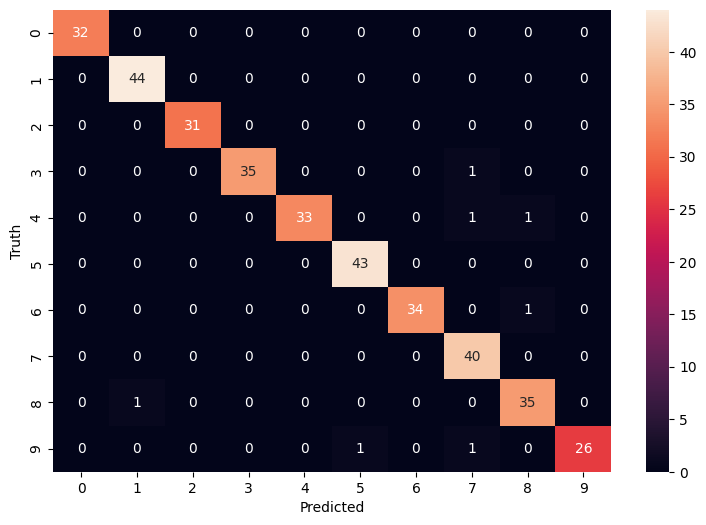

In [11]:
#ploting heatmap of cmatrix
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [12]:
print(classification_report(y_test, y_pred))
#### END YOUR CODE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        31
           3       1.00      0.97      0.99        36
           4       1.00      0.94      0.97        35
           5       0.98      1.00      0.99        43
           6       1.00      0.97      0.99        35
           7       0.93      1.00      0.96        40
           8       0.95      0.97      0.96        36
           9       1.00      0.93      0.96        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Question 2
<div class="alert alert-block alert-warning" style="font-family: Arial; font-size:1.2em;"> 
    Using <b>Wines</b> dataset, classify using TensorFlow <i>Sequential Model</i>. Dataset is provided with the question.
    </div>

**Dataset Information:**

**Reference**
[Wine DataSet](https://archive.ics.uci.edu/ml/datasets/wine)

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivators. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it )
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline


**Attribute Information:**

All attributes are continuous

**NOTE:** 1st attribute is class identifier (1-3)

### Q 2.1 Import all the libraries you may need for successful execution of your code. - (2 marks)

In [29]:
#### START YOUR CODE
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
#### END YOUR CODE

### Q 2.2 Hyper-Parameters and others. - (3 marks)

**Note:** Declaration of Hyper-Parameters elsewhere should be avoided. 

In [14]:
#### START YOUR CODE
#col name
n_layers = 3
layer_sizes = [64, 32, 16]
activations = ['relu', 'relu', None]
loss_fn = 'mse'
optimizer = 'adam'
learning_rate = 0.001
batch_size = 32
n_epochs = 100
#### END YOUR CODE

## Helper Function

<div class="alert alert-block alert-warning" style="font-family: Arial; font-size:1.2em;"> 
    <b>Following is to assist you in plotting loss and accuracy curves.</b>
The helper function is given for your convenience. Feel free to modify as deemed fit.
    </div>

In [15]:
def fn_plot_hist(hist_df):
    
    # instantiate plt object with 1 row two columns
    fig, axes = plt.subplots(1,2 , figsize = (15,6)) 

    # propertiesfor matplotlib.patch.Patch 
    props = dict(boxstyle='round', 
                 facecolor='aqua', 
                 alpha=0.4)

    ax = axes[0]

    # plot loss columns of the dataframe
    hist_df.plot(y = ['loss','val_loss'], ax = ax, colormap=CMAP)

    # mark min loss and min val_loss
    lossmin = hist_df['loss'].min()
    testmin = hist_df['val_loss'].min()

    # little beautification
    txtstr = "Min Loss: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(lossmin,
                                                                            testmin) #text to plot

    # place a text box in upper left in axis coords
    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # set labels on the axes
    ax.set_xlabel("Epochs")

    ax.set_ylabel("Loss")

    # show grid
    ax.grid();

    # for second figure
    ax = axes[1]

    # plot accuracy and val_accuracy
    hist_df.plot( y = ['accuracy', 'val_accuracy'], ax = ax, colormap=CMAP)
    

    # get max accuracies
    accmax = hist_df['accuracy'].max()
    testmax = hist_df['val_accuracy'].max()
    
    # little beautification
    txtstr = "Max Accuracy: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(accmax,
                                                                                testmax) #text to plot

    # place a text box in upper left in axis coords
    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # mark labels
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Accuracy")
    
    # show grid
    ax.grid();
    
    # organise subplot params so that the subplots fit in to the figure area
    plt.tight_layout()

### Q 2.3 Load Data  and prepare train and test sets from the data. - (5 marks)

**Note:** 
1. Use of any **other** dataset will make this submission **invalid**.
2. The information provided in this Notebook is sufficient to enter column names.
3. You may also use `wine.names` file for column names

In [30]:
#### START YOUR CODE
winedata=pd.read_csv("./wine.data")
column_names = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar',
                'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
                'pH','sulphates','alcohol','quality']

#training and testing sets
train, test = train_test_split(winedata, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='sigmoid', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='sigmoid'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

sc = StandardScaler()

train = sc.fit_transform(train)

test = sc.transform(test)
#### END YOUR CODE

112 train examples
29 validation examples
36 test examples


### Q 2.4 Declare your model, compile and fit the model. - **(5 marks)**

1. Specify kernel initializer.
2. Prepare model using Sequential class of TensorFlow with one Hidden Layer and one output layer.

In [33]:
#### START YOUR CODE
#model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(18, activation='swish'), # alternatively activation = tf.nn.silu
  tf.keras.layers.Dense(4) # notice absense of softmax function
])

# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)
#### END YOUR CODE

Epoch 1/100


/home/hpcap/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


32/32 [==============================] - 1s 5ms/step - loss: 28.0366 - val_loss: 10.0424
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4029 - val_loss: 4.5897
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8468 - val_loss: 3.2904
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8281 - val_loss: 2.4671
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1570 - val_loss: 1.7949
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5984 - val_loss: 1.2702
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2349 - val_loss: 0.9973
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0296 - val_loss: 0.8574
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9193 - val_loss: 0.7609
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8553 - val_loss: 0.7219
Epoch 11/100
32/32 

32/32 [==============================] - 0s 2ms/step - loss: 0.4836 - val_loss: 0.3603
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4865 - val_loss: 0.3418
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4818 - val_loss: 0.3457
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4762 - val_loss: 0.3439
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4832 - val_loss: 0.3454
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4924 - val_loss: 0.3699
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4779 - val_loss: 0.3439
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4816 - val_loss: 0.3605
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4817 - val_loss: 0.3382
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4789 - val_loss: 0.3457
Epoch 93/100


### Q 2.5 Plot loss and accuracy curves and comment on loss curve. - (5 marks)

In [32]:
#### START YOUR CODE
loss, mse = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test mean squared error:', mse)
#### END YOUR CODE

10/10 [==============================] - 0s 1ms/step - loss: 0.3842


TypeError: cannot unpack non-iterable float object

In [20]:
winedata=pd.read_csv("./wine.data")

In [ ]:
column_names = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar',
                'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
                'pH','sulphates','alcohol','quality']